<h1>Fancy Indexing</h1>

In [1]:
# In Fancy Indexing we pass arrays of indexes in place of single scalars. This allows us to very quickly access 
# and modify complicates subsets of an array's values
import numpy as np

<h3>Exploring Fancy Indexing</h3>

In [3]:
# Fancy Indexing means passing an array of indices to access multiple array elements at once. 
rand = np.random.RandomState(42)
x = rand.randint(100, size=(10))
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [4]:
# If we want to access three different elements
x[3],x[7],x[2]

(71, 86, 14)

In [5]:
# We can pass a single list or array of indices to obtain the same result:
ind = [3,7,2]
x[ind]

array([71, 86, 14])

In [7]:
# With fancy indexing the shape of the result reflects the shape of the index arrays rather than the shape of the 
# array being indexed. 
ind = np.array([[3,7],
               [4,5]])
x[ind]

array([[71, 86],
       [60, 20]])

In [8]:
# Fancy Indexing also works in multiple dimensions
X = np.arange(12).reshape((3,4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [10]:
# The first index refers to the row and second to the column
row = np.array([0,1,2])
col = np.array([2,1,3])
X[row,col]

array([ 2,  5, 11])

In [11]:
# If we combine a column vector and a row vector within the indices, we get a two dimensional result
X[row[:,np.newaxis],col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [13]:
#Here each row values is matched with each column vector,exactly as we saw in broadcasting of arithmetic operations
row[:,np.newaxis]*col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

In [14]:
# The return value of fancy indexing reflects the broadcast shape of the indices, rather than the shape of the 
# array being indexed. 

<h3>Combined Indexing</h3>

In [15]:
# Fancy indexing can be combines with the other indexing schemes:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [16]:
# We can combine fancy and simple indexes:
X[2, [2,0,1]]

array([10,  8,  9])

In [17]:
# Fancy indexing can also be combined with slicing:
X[1:,[2,0,1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [18]:
# Fancy indexing can be combined with Masking
mask = np.array([1,0,1,0],dtype=bool)
X[row[:,np.newaxis],mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

<h3>Selecting Random Points</h3>

In [19]:
# One common use of fancy indexing is the selection of subsets of rows from a matrix.
mean = [0,0]
cov = [[1,2],
       [2,5]]
X = rand.multivariate_normal(mean,cov,100)
X.shape

(100, 2)

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn;seaborn.set()

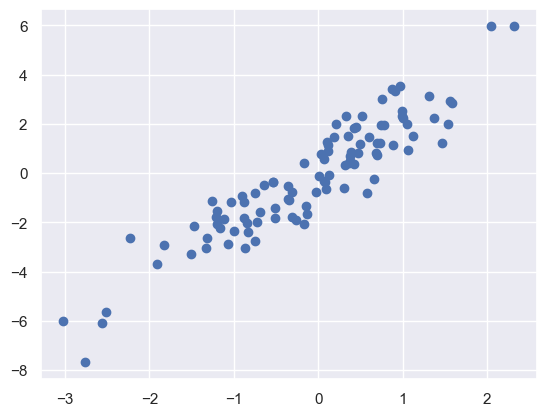

In [21]:
# We can visualize these points as scatter plot:
plt.scatter(X[:,0],X[:,1]);

In [22]:
# Select 20 random points using fancy indexing. 
# We choose 20 first random indices with no repeats and use these indices to select the portion of the 
# original array
indices = np.random.choice(X.shape[0],20, replace=False)
indices

array([68, 54, 34, 62, 81, 85, 58, 84, 79, 83, 13, 19, 29,  4,  9, 39,  1,
       59,  7, 99])

In [23]:
selection = X[indices]
selection.shape

(20, 2)

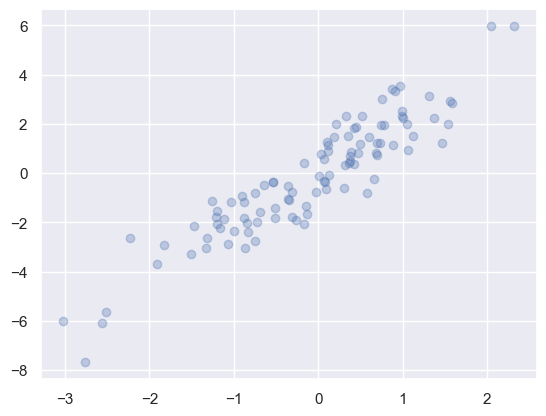

In [24]:
# Recreated plot will be as:
plt.scatter(X[:,0], X[:,1], alpha=0.3)
plt.scatter(selection[:,0],selection[:,1], facecolor="none", s=200);

<h3>Modifying values with fancy indexing</h3>

In [25]:
# Fancy indexing can be used to modify parts of an array
# Example set the items in an array:
x = np.arange(10)
i = np.array([2,1,8,4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


In [26]:
# We can use any assignment type operator for this:
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


In [27]:
x = np.zeros(10)
x[[0,0]] = [4,6]
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [28]:
# Additional faulty operations
i = [2,3,3,4,4,4]
x[i] += 1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

In [29]:
# With Fancy indexing modifications it is not the augmentation that happens multiple times, but the assignment
# which leads to the rather non-intuitive results
# Operations to be repeated handling
x = np.zeros(10)
np.add.at(x,i,1)
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


<h3>Binning Data</h3>

In [30]:
# The ideas of fancy indexing can be used to efficiently bin data to create histogram by hand
np.random.seed(42)
x = np.random.randn(100)

# Compute a histogram by hand
bins = np.linspace(-5,5,20)
counts = np.zeros_like(bins)

# Find the appropriate bin for each x
i = np.searchsorted(bins,x)

# Add 1 to each of these bins
np.add.at(counts,i,1)

# The counts now reflects the number of points for each bin

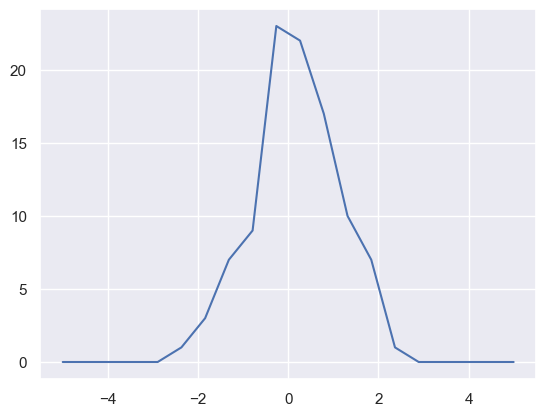

In [33]:
# Plot the results
plt.plot(bins, counts,linestyle="solid")

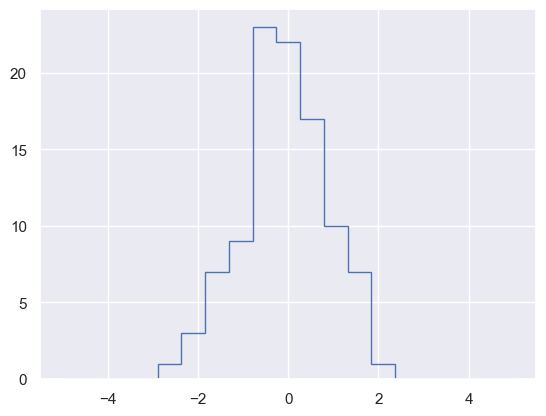

In [35]:
# The same can be done using plt.hist in a single line
plt.hist(x, bins,histtype="step");

In [36]:
# To compute the binning, Matplotlib uses the np.histogram function,which does a very similar computation
# to what we did before:
print("Numpy routine:")
%timeit counts, edges=np.histogram(x,bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins,x),1)

Numpy routine:
8.81 µs ± 139 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
Custom routine:
9.41 µs ± 12.5 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [37]:
# Dig into np.histogram source code
np.histogram??

In [38]:
# Numpy's algorithm is flexible and particularly designed for better performance, when the number of data points
# become large
x = np.random.randn(1000000)
print("Numpy routine:")
%timeit counts, edges=np.histogram(x,bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins,x),1)

Numpy routine:
61.4 ms ± 124 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Custom routine:
78.7 ms ± 999 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
